In [1]:
import warnings
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown , Math 

sns.set()
warnings.filterwarnings('ignore')

In [2]:
def printmd(string): display(Markdown(string))
def latex(out): printmd(f'{out}')  
def pr(string): printmd('***{}***'.format(string))

In [3]:
test = pd.read_csv("../../../resources/data/titanic/test.csv")
train = pd.read_csv("../../../resources/data/titanic/train.csv")

In [4]:

#combine = pd.concat([train.drop('Survived',1),test])

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


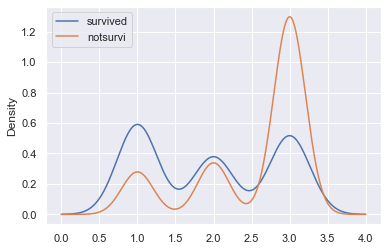

In [8]:
train[train['Survived']==1]['Pclass'].plot.kde(label='survived')
train[train['Survived']==0]['Pclass'].plot.kde(label='notsurvi')
plt.legend()

In [9]:
train['Survived'].sum()/len(train['Survived'])

0.3838383838383838

we are searching for densitity function (likelihood function):
$$P(x|y=survive)$$ and $$P(x|y=non-survive)$$

in order to find $$P(y=survive|x) = p(y=survive)p(x|y_survive)$$

In [10]:
from scipy.stats import norm


In [11]:
describe_non_survived = train[train['Survived']==0].describe()
describe_survived = train[train['Survived']==1].describe()
#mean = 
#norm()
describe['Pclass']['mean']
describe['Pclass']['std']

NameError: name 'describe' is not defined

In [ ]:
gausian = norm.pdf(x= train['Survived'],scale=describe['Pclass']['std'] ,loc = describe['Pclass']['mean'])

In [ ]:
snd = norm(loc=describe['Pclass']['mean'], scale=describe['Pclass']['std'])

In [ ]:
mu = describe_non_survived['Pclass']['mean']
sigma = describe_non_survived['Pclass']['std']
x = np.linspace(0,10)
plt.plot(x,norm.pdf(x, mu, sigma),label='not-surv')
mu = describe_survived['Pclass']['mean']
sigma = describe_survived['Pclass']['std']
x = np.linspace(0,10)
plt.plot(x,norm.pdf(x, mu, sigma),label='surv')
plt.legend()

In [ ]:
def gausian(x, mu, sigma):
    c = 1/(2*np.pi*sigma**2)**(1/2)
    return c*np.exp( - (x - mu)**2/(2*sigma**2) )

In [ ]:
not_survive_norm_likhood = gausian(1,describe_non_survived['Pclass']['mean'],describe_non_survived['Pclass']['std'])

In [ ]:
prob_y = train['Survived'].sum()/len(train['Survived'])
prob_not_y = 1 - prob_y

In [ ]:
mu = describe_non_survived['Pclass']['mean']
sigma = describe_non_survived['Pclass']['std']
x = np.linspace(0,10)
plt.plot(x,norm.pdf(x, mu, sigma)*prob_not_y,label='P(x|y=not_survived)')
mu = describe_survived['Pclass']['mean']
sigma = describe_survived['Pclass']['std']
x = np.linspace(0,10)
plt.plot(x,norm.pdf(x, mu, sigma)*prob_y,label=r'$P(x|y=survived)$')
plt.legend()

In [ ]:
print(type( describe_survived['Pclass']))

We will make a function that calculate likelihood(ProbabilityDensityFunction)PDF
for feature class 'Pclass' in order to calucate baysen estimation

In [ ]:
def likelihood_function(feature_describe):
    """
    feature_describe : pandas Series
    
    """
    
    sigma= feature_describe['std']
    mu = feature_describe['mean']
    
    def pdf(x):
        """
        """
        print('sigma',sigma)
        return norm.pdf(x, mu, sigma)
    
    
    return pdf

In [ ]:
x = np.linspace(0,4)
y = likelihood_function(describe_survived['Pclass'])(x)
y_1 = likelihood_function(describe_non_survived['Pclass'])(x)
plt.plot(x,y,label='P(x|y=survived)')
plt.plot(x,y_1,label=r'P(x|y=not_survived)')
plt.title('likelihood of Pclass')
plt.legend()

In [ ]:
likelihood_function(describe_survived['Pclass'])([0,1,2,3])

In [ ]:
likelihood_function(describe_non_survived['Pclass'])([0,1,2,3])

In [ ]:
prob_not_y 

In [ ]:
x = np.linspace(0,4)
y = likelihood_function(describe_survived['Pclass'])(x)*prob_y 
y_1 = likelihood_function(describe_non_survived['Pclass'])(x)*prob_not_y 
plt.plot(x,y,label='P(x|y=survived)')
plt.plot(x,y_1,label=r'P(x|y=not_survived)')
plt.title('likelihood of Pclass')
plt.legend()

In [ ]:
likelihood_function(describe_non_survived['Pclass'])([0,1,2,3])*prob_not_y 

In [ ]:
likelihood_function(describe_survived['Pclass'])([0,1,2,3])*prob_y 

In [ ]:
def predict(x,sigma, mu,prob_y,sigma_not, mu_not,prob_y_not ):
    yes = norm.pdf(x, mu, sigma)*prob_y
    no = norm.pdf(x, mu_not, sigma_not)*prob_y_not
    return {"survive LikeliH":yes,"not_survive LikeliH":yes}

In [ ]:
type(train['Pclass'])
train['Pclass'].apply(predict,a='fuck')

In [ ]:
def likelihood(x,sigma,mu)

In [ ]:
train

In [ ]:
#def likelihood_vars(x, y):
    
y_train = train['Survived'] 
x_train = train.drop('Survived',axis=1)
y_train.unique()
train['Sex'] = (train['Sex']=='male').astype(int)

In [ ]:
'''
   label = 'Survived'
   feature = 'Pclass'
  
  ''' 

def get_stats(data, label, feature):
    result = {}
    for i in train[label].unique():
        stats = train[train[label] == i].describe()[feature]
        result[i] = stats[[1,2]]
    
    return result
    

In [ ]:
stats = get_stats(train, label = 'Survived',  feature = 'Pclass')

In [ ]:
for label_value in stats.keys():
    print(stats[label_value]['mean'])

In [ ]:
def predict(x_test, stats):
    pass



def calculate(x, label_stats, prob):
    predict = None
    weight = 0
    #print(f"x={x}")
    for label_value in label_stats:
        sigma = label_stats[label_value]['std']
        mu = label_stats[label_value]['mean']
        likelihood = norm.pdf(x, mu, sigma)
        bayes = likelihood*prob[label_value]
        #print(label_value, bayes)
        if weight<=bayes:
            weight=bayes
            #print(f'weigh{weight}')
            predict = label_value
            
            
    return  predict
        

    
   
prob = train.groupby(by=label,axis=0)[label].count()/len(train[label])
 

In [ ]:
stats = get_stats(train, label = 'Survived',  feature = 'Pclass')
prob = train.groupby(by=label,axis=0)[label].count()/len(train[label])

result = train[feature].apply(calculate, label_stats=stats,prob = prob )

In [ ]:
result

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(result, train[label])

In [ ]:
accuracy_score(result, train[label])

In [ ]:
stats = get_stats(train, label = 'Survived',  feature = 'Sex')

In [ ]:
stats


In [ ]:
x = np.linspace(-1,2)
yes = norm.pdf(x,stats[0]['mean'], stats[0]['std'])
no = norm.pdf(x,stats[1]['mean'], stats[1]['std'])
plt.plot(x,yes,label='P(x|y=survived)')
plt.plot(x,no,label=r'P(x|y=not_survived)')
plt.title('likelihood of Sex')
plt.legend()

In [ ]:
stats = get_stats(train, label = 'Survived',  feature = 'Sex')
prob = train.groupby(by=label,axis=0)[label].count()/len(train[label])

result = train[feature].apply(calculate, label_stats=stats,prob = prob )
result

In [ ]:
accuracy_score(result, train[label])